In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd


In [8]:
print(getcwd())

/content


In [51]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned Blinkit Grocery Data.xlsx to Cleaned Blinkit Grocery Data (2).xlsx


In [53]:
df = pd.read_excel('Cleaned Blinkit Grocery Data (2).xlsx')


In [90]:
#1 Find the total number of unique items and outlets using nunique

print(f" There are {df['Item_Identifier'].nunique()} unique items")
print(f" There are {df['Outlet_Identifier'].nunique()} unique outlets")


 There are 1535 unique items
 There are 5 unique outlets


In [95]:
#2 Find the Highes grossing outlet

highest_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(1)
print(f"The highest grossing outlet is {highest_outlet.index[0]}")

df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

The highest grossing outlet is OUT035


,Item_Outlet_Sales
Outlet_Identifier,
OUT035,2.268123e+06
OUT049,2.183970e+06
OUT013,2.142664e+06
OUT046,2.118395e+06
OUT018,1.851823e+06


In [92]:
#3 Find the top 10 best selling products

top_10 = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
print(f"The top 10 best selling products are {top_10.index.tolist()}")


The top 10 best selling products are ['FDL58', 'FDY55', 'FDD44', 'FDA04', 'FDB15', 'FDA15', 'FDC02', 'FDK21', 'FDN58', 'FDQ39']


In [94]:
#4 Find most profitable Item Types

most_profitable = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(1)
print(f"The most profitable item type is {most_profitable.index[0]}")


df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

The most profitable item type is Snack Foods


,Item_Outlet_Sales
Item_Type,
Snack Foods,1.568592e+06
Fruits and Vegetables,1.549511e+06
Household,1.188504e+06
Frozen Foods,1.059900e+06
Dairy,8.882198e+05
Canned,7.960811e+05
Baking Goods,7.184262e+05
Health and Hygiene,5.922457e+05
Meat,4.972714e+05


Item_Fat_Content
Regular    3769240.276
Low Fat    6795734.046
Name: Item_Outlet_Sales, dtype: float64


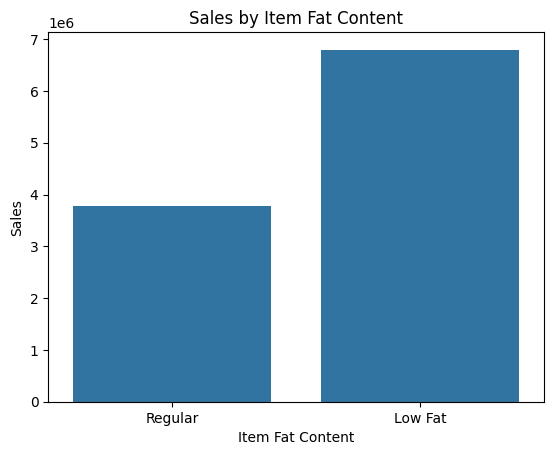

In [56]:
#5 Compare the sales between low fat and regular products

fat = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().sort_values()
print(fat)
sns.barplot(x=fat.index, y=fat.values)
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.title('Sales by Item Fat Content')
plt.show()

Outlet_Size
High      2.142664e+06
Medium    4.035793e+06
Small     4.386518e+06
Name: Item_Outlet_Sales, dtype: float64
 
Outlet_Type
Supermarket Type2    1851822.830
Supermarket Type1    8713151.492
Name: Item_Outlet_Sales, dtype: float64


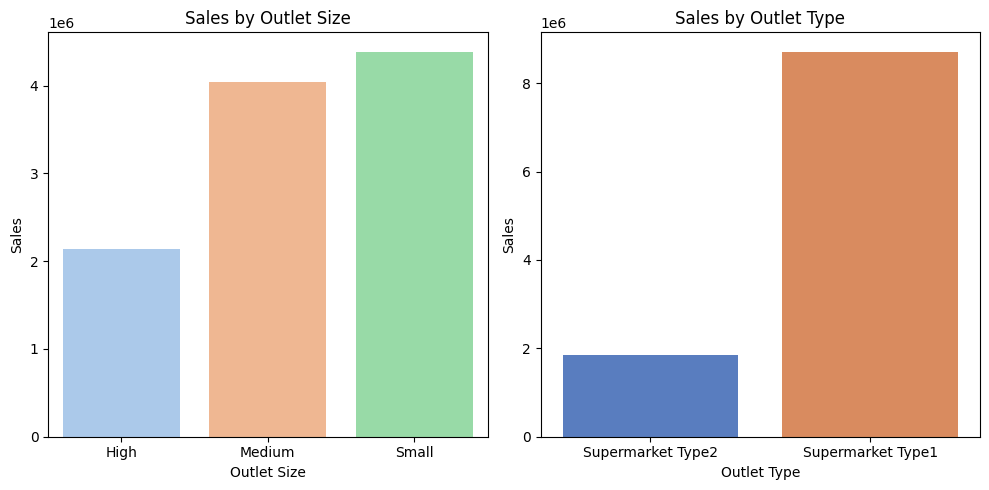

In [77]:
#6 Compare Performance by Outlet_size and outlet_type

outlet_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values()
print(outlet_size)
print(" ")
outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()
print(outlet_type)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=outlet_size.index, y=outlet_size.values, ax=axs[0], palette='pastel')
axs[0].set_xlabel('Outlet Size')
axs[0].set_ylabel('Sales')
axs[0].set_title('Sales by Outlet Size')

sns.barplot(x=outlet_type.index, y=outlet_type.values, ax=axs[1], palette= 'muted')
axs[1].set_xlabel('Outlet Type')
axs[1].set_ylabel('Sales')
axs[1].set_title('Sales by Outlet Type')

plt.tight_layout()
plt.show()


In [78]:
#7 Average MRP across different product categories

avg_mrp = df.groupby('Item_Type')['Item_MRP'].mean().sort_values()
print(avg_mrp)

Item_Type
Baking Goods             125.795653
Soft Drinks              130.910182
Health and Hygiene       131.437324
Breakfast                134.090683
Others                   137.640870
Canned                   138.551179
Frozen Foods             140.095830
Hard Drinks              140.102908
Meat                     140.279344
Breads                   141.300639
Fruits and Vegetables    145.418257
Seafood                  146.595782
Snack Foods              147.569955
Dairy                    149.481471
Household                149.884244
Starchy Foods            151.256747
Name: Item_MRP, dtype: float64


                   Item_MRP  Item_Visibility  Item_Outlet_Sales
Item_MRP           1.000000        -0.007292           0.679594
Item_Visibility   -0.007292         1.000000          -0.009644
Item_Outlet_Sales  0.679594        -0.009644           1.000000


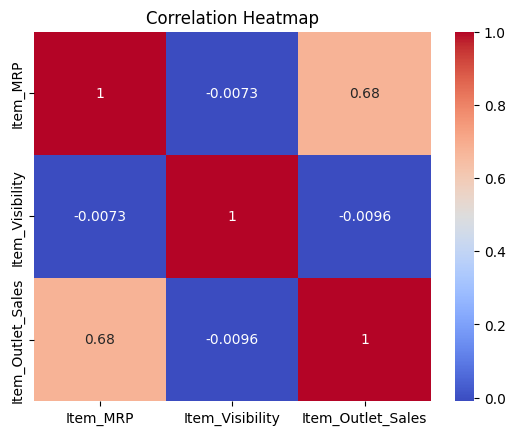

In [89]:
#8 Correlation between variables like price, visibility, and sales

correlation = df[['Item_MRP', 'Item_Visibility', 'Item_Outlet_Sales']].corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Outlet_Establishment_Year
1987    2.142664e+06
1997    2.118395e+06
1999    2.183970e+06
2004    2.268123e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64


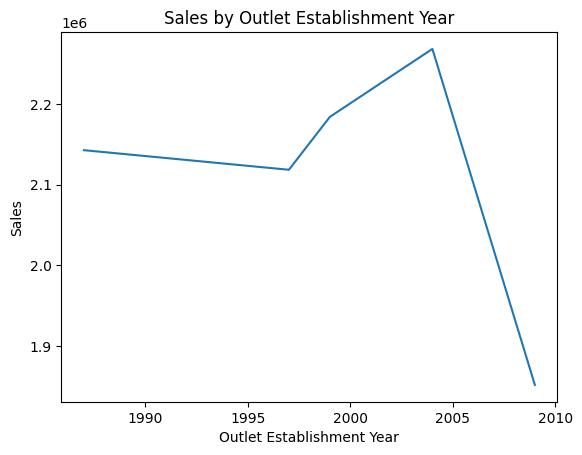

In [84]:
#9 Find the relation between establishment year and Outlet performance

establishment_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_index()
print(establishment_year)

sns.lineplot(x=establishment_year.index, y=establishment_year.values, palette= 'set2')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.title('Sales by Outlet Establishment Year')
plt.show()

In [79]:
#10 Top performing Location

top_location = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(1)
print(f"The top performing location is {top_location.index[0]}")

The top performing location is Tier 1
